In [1]:
#run this cell to install necessary packages
!pip install scikit-image
!pip install opencv-python

In [23]:
import os
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt

from skimage.io import imread
from skimage.transform import resize
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error as mse
from scipy.stats import ttest_ind

In [3]:
malignant_folder = "C://Users//abhil//OneDrive//Desktop//MSAM-Northeastern//MATH7203//Mini Project 2//Data//siim-isic-melanoma-classification//jpeg//train//malignant//"

## Define the Interpolation Methods to use

In [4]:
# define the list of interpolation methods to use
interpolation_methods = [cv2.INTER_NEAREST, cv2.INTER_LINEAR, cv2.INTER_AREA, cv2.INTER_CUBIC, cv2.INTER_LANCZOS4]

## Visualizing original image and interpolated image

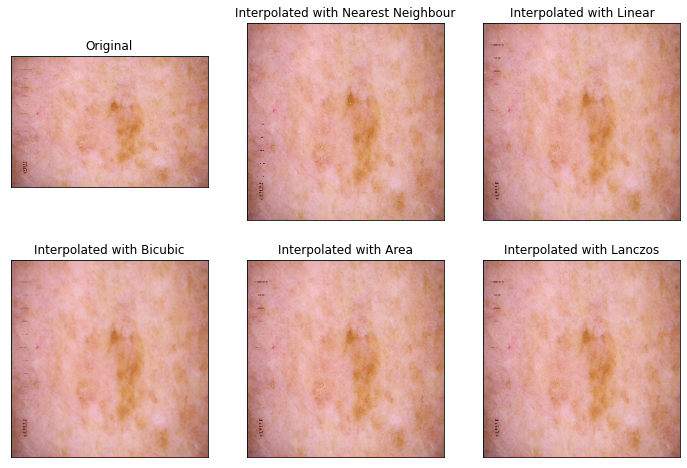

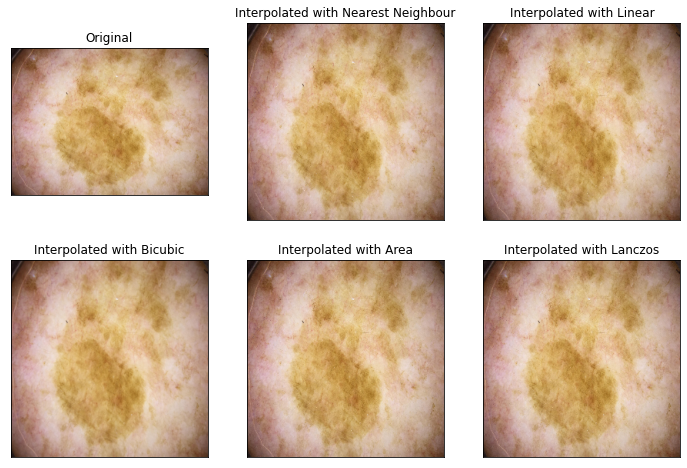

In [19]:
# read the first two images in the malignant_folder
image_files = os.listdir(malignant_folder)[:2]

for image_file in image_files:

    img = cv2.imread(os.path.join(malignant_folder, image_file))

    plt.figure(figsize=(12, 8))

    plt.subplot(2, 3, 1, xticks=[], yticks=[])
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original')

    for i, method in enumerate(interpolation_methods):
        
        resized_img = cv2.resize(img, (256, 256), interpolation=method)
        
        if method == 0:
            interp = 'Nearest Neighbour'
        elif method == 1:
            interp = 'Linear'
        elif method == 2:
            interp = 'Area'
        elif method == 3:
            interp = 'Bicubic'
        else:
            interp = 'Lanczos'

        plt.subplot(2, 3, i+2, xticks=[], yticks=[])
        plt.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
        plt.title('Interpolated with {}'.format(interp))

    plt.show()


In [20]:
results_df = pd.DataFrame(columns=['image', 'interpolation_method', 'psnr', 'ssim', 'mse'])

## Data Augmentation Using Interpolation

### Calculating MSE, PSNR and SSIM for each of the image generated by each interpolation method against the original image

In [24]:
for image_name in os.listdir(malignant_folder):
    
    image = cv2.imread(os.path.join(malignant_folder, image_name), cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(image, (image.shape[1]//2, image.shape[0]//2))
    
    for method in interpolation_methods:
        resized_image = cv2.resize(image, (image.shape[1]//2, image.shape[0]//2), interpolation=method)
        
        # calculate the PSNR, SSIM, and MSE
        PSNR = psnr(img, resized_image)
        SSIM = ssim(img, resized_image)
        MSE = mse(img, resized_image)

        # handle the case where PSNR is infinite
        if np.isinf(PSNR):
            PSNR = 0
            
        interp_names = {
            0: 'Nearest Neighbour',
            1: 'Linear',
            2: 'Area',
            3: 'Bicubic',
            4: 'Lanczos'
        }
        
        interp_name = interp_names[method]
        
        print(f"Image: {image_name} Interpolation Method: {interp_name} psnr: {PSNR:.2f} ssim: {SSIM:.2f} mse: {MSE:.2f}")

        results_df = results_df.append({'image': image_name, 'interpolation_method': interp_name, 'psnr': PSNR, 'ssim': SSIM, 'mse': MSE}, ignore_index=True)

#print(results_df)

Image: ISIC_0149568.jpg Interpolation Method: Nearest Neighbour psnr: 46.62 ssim: 0.99 mse: 1.42


C:\Users\abhil\anaconda3\lib\site-packages\skimage\metrics\simple_metrics.py:160: RuntimeWarning: divide by zero encountered in double_scalars
  return 10 * np.log10((data_range ** 2) / err)


Image: ISIC_0149568.jpg Interpolation Method: Linear psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_0149568.jpg Interpolation Method: Bicubic psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_0149568.jpg Interpolation Method: Area psnr: 52.04 ssim: 1.00 mse: 0.41
Image: ISIC_0149568.jpg Interpolation Method: Lanczos psnr: 49.71 ssim: 0.99 mse: 0.69
Image: ISIC_0188432.jpg Interpolation Method: Nearest Neighbour psnr: 44.93 ssim: 0.98 mse: 2.09
Image: ISIC_0188432.jpg Interpolation Method: Linear psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_0188432.jpg Interpolation Method: Bicubic psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_0188432.jpg Interpolation Method: Area psnr: 51.64 ssim: 1.00 mse: 0.45
Image: ISIC_0188432.jpg Interpolation Method: Lanczos psnr: 49.16 ssim: 0.99 mse: 0.79
Image: ISIC_0207268.jpg Interpolation Method: Nearest Neighbour psnr: 46.38 ssim: 0.99 mse: 1.50
Image: ISIC_0207268.jpg Interpolation Method: Linear psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_0207268.jpg Interpolation

Image: ISIC_0504165.jpg Interpolation Method: Nearest Neighbour psnr: 46.49 ssim: 0.99 mse: 1.46
Image: ISIC_0504165.jpg Interpolation Method: Linear psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_0504165.jpg Interpolation Method: Bicubic psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_0504165.jpg Interpolation Method: Area psnr: 52.74 ssim: 1.00 mse: 0.35
Image: ISIC_0504165.jpg Interpolation Method: Lanczos psnr: 50.40 ssim: 1.00 mse: 0.59
Image: ISIC_0528044.jpg Interpolation Method: Nearest Neighbour psnr: 35.67 ssim: 0.96 mse: 17.63
Image: ISIC_0528044.jpg Interpolation Method: Linear psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_0528044.jpg Interpolation Method: Bicubic psnr: 50.40 ssim: 1.00 mse: 0.59
Image: ISIC_0528044.jpg Interpolation Method: Area psnr: 51.83 ssim: 1.00 mse: 0.43
Image: ISIC_0528044.jpg Interpolation Method: Lanczos psnr: 50.52 ssim: 1.00 mse: 0.58
Image: ISIC_0533122.jpg Interpolation Method: Nearest Neighbour psnr: 45.54 ssim: 0.98 mse: 1.82
Image: ISIC_0533122.jpg

Image: ISIC_0952472.jpg Interpolation Method: Nearest Neighbour psnr: 50.47 ssim: 0.99 mse: 0.58
Image: ISIC_0952472.jpg Interpolation Method: Linear psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_0952472.jpg Interpolation Method: Bicubic psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_0952472.jpg Interpolation Method: Area psnr: 53.77 ssim: 1.00 mse: 0.27
Image: ISIC_0952472.jpg Interpolation Method: Lanczos psnr: 51.31 ssim: 1.00 mse: 0.48
Image: ISIC_0953317.jpg Interpolation Method: Nearest Neighbour psnr: 44.71 ssim: 0.98 mse: 2.20
Image: ISIC_0953317.jpg Interpolation Method: Linear psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_0953317.jpg Interpolation Method: Bicubic psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_0953317.jpg Interpolation Method: Area psnr: 51.06 ssim: 0.99 mse: 0.51
Image: ISIC_0953317.jpg Interpolation Method: Lanczos psnr: 49.05 ssim: 0.99 mse: 0.81
Image: ISIC_0961235.jpg Interpolation Method: Nearest Neighbour psnr: 45.86 ssim: 0.98 mse: 1.69
Image: ISIC_0961235.jpg I

Image: ISIC_1177505.jpg Interpolation Method: Lanczos psnr: 49.76 ssim: 0.99 mse: 0.69
Image: ISIC_1200192.jpg Interpolation Method: Nearest Neighbour psnr: 38.93 ssim: 0.98 mse: 8.33
Image: ISIC_1200192.jpg Interpolation Method: Linear psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_1200192.jpg Interpolation Method: Bicubic psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_1200192.jpg Interpolation Method: Area psnr: 46.54 ssim: 1.00 mse: 1.44
Image: ISIC_1200192.jpg Interpolation Method: Lanczos psnr: 45.50 ssim: 0.99 mse: 1.83
Image: ISIC_1210011.jpg Interpolation Method: Nearest Neighbour psnr: 44.96 ssim: 0.99 mse: 2.07
Image: ISIC_1210011.jpg Interpolation Method: Linear psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_1210011.jpg Interpolation Method: Bicubic psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_1210011.jpg Interpolation Method: Area psnr: 51.84 ssim: 1.00 mse: 0.43
Image: ISIC_1210011.jpg Interpolation Method: Lanczos psnr: 49.16 ssim: 0.99 mse: 0.79
Image: ISIC_1231419.jpg Interpolati

Image: ISIC_1566428.jpg Interpolation Method: Area psnr: 52.69 ssim: 1.00 mse: 0.35
Image: ISIC_1566428.jpg Interpolation Method: Lanczos psnr: 50.33 ssim: 0.99 mse: 0.60
Image: ISIC_1569119.jpg Interpolation Method: Nearest Neighbour psnr: 44.57 ssim: 0.97 mse: 2.27
Image: ISIC_1569119.jpg Interpolation Method: Linear psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_1569119.jpg Interpolation Method: Bicubic psnr: 54.40 ssim: 1.00 mse: 0.24
Image: ISIC_1569119.jpg Interpolation Method: Area psnr: 53.33 ssim: 1.00 mse: 0.30
Image: ISIC_1569119.jpg Interpolation Method: Lanczos psnr: 53.19 ssim: 1.00 mse: 0.31
Image: ISIC_1589997.jpg Interpolation Method: Nearest Neighbour psnr: 46.78 ssim: 0.98 mse: 1.36
Image: ISIC_1589997.jpg Interpolation Method: Linear psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_1589997.jpg Interpolation Method: Bicubic psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_1589997.jpg Interpolation Method: Area psnr: 52.68 ssim: 1.00 mse: 0.35
Image: ISIC_1589997.jpg Interpolation

Image: ISIC_1881133.jpg Interpolation Method: Bicubic psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_1881133.jpg Interpolation Method: Area psnr: 53.37 ssim: 1.00 mse: 0.30
Image: ISIC_1881133.jpg Interpolation Method: Lanczos psnr: 50.32 ssim: 1.00 mse: 0.60
Image: ISIC_1948545.jpg Interpolation Method: Nearest Neighbour psnr: 42.13 ssim: 0.98 mse: 3.98
Image: ISIC_1948545.jpg Interpolation Method: Linear psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_1948545.jpg Interpolation Method: Bicubic psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_1948545.jpg Interpolation Method: Area psnr: 50.15 ssim: 1.00 mse: 0.63
Image: ISIC_1948545.jpg Interpolation Method: Lanczos psnr: 48.12 ssim: 0.99 mse: 1.00
Image: ISIC_1952749.jpg Interpolation Method: Nearest Neighbour psnr: 29.78 ssim: 0.97 mse: 68.35
Image: ISIC_1952749.jpg Interpolation Method: Linear psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_1952749.jpg Interpolation Method: Bicubic psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_1952749.jpg Interpolati

Image: ISIC_2200197.jpg Interpolation Method: Linear psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_2200197.jpg Interpolation Method: Bicubic psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_2200197.jpg Interpolation Method: Area psnr: 51.84 ssim: 1.00 mse: 0.43
Image: ISIC_2200197.jpg Interpolation Method: Lanczos psnr: 50.21 ssim: 0.99 mse: 0.62
Image: ISIC_2212473.jpg Interpolation Method: Nearest Neighbour psnr: 31.39 ssim: 0.92 mse: 47.20
Image: ISIC_2212473.jpg Interpolation Method: Linear psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_2212473.jpg Interpolation Method: Bicubic psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_2212473.jpg Interpolation Method: Area psnr: 42.48 ssim: 0.99 mse: 3.67
Image: ISIC_2212473.jpg Interpolation Method: Lanczos psnr: 40.36 ssim: 0.98 mse: 5.98
Image: ISIC_2221217.jpg Interpolation Method: Nearest Neighbour psnr: 29.48 ssim: 0.95 mse: 73.36
Image: ISIC_2221217.jpg Interpolation Method: Linear psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_2221217.jpg Interpolati

Image: ISIC_2437633.jpg Interpolation Method: Nearest Neighbour psnr: 45.27 ssim: 0.98 mse: 1.93
Image: ISIC_2437633.jpg Interpolation Method: Linear psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_2437633.jpg Interpolation Method: Bicubic psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_2437633.jpg Interpolation Method: Area psnr: 51.47 ssim: 1.00 mse: 0.46
Image: ISIC_2437633.jpg Interpolation Method: Lanczos psnr: 49.03 ssim: 0.99 mse: 0.81
Image: ISIC_2447578.jpg Interpolation Method: Nearest Neighbour psnr: 45.43 ssim: 0.98 mse: 1.86
Image: ISIC_2447578.jpg Interpolation Method: Linear psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_2447578.jpg Interpolation Method: Bicubic psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_2447578.jpg Interpolation Method: Area psnr: 51.24 ssim: 0.99 mse: 0.49
Image: ISIC_2447578.jpg Interpolation Method: Lanczos psnr: 49.18 ssim: 0.99 mse: 0.79
Image: ISIC_2448123.jpg Interpolation Method: Nearest Neighbour psnr: 34.08 ssim: 0.97 mse: 25.41
Image: ISIC_2448123.jpg 

Image: ISIC_2750230.jpg Interpolation Method: Lanczos psnr: 47.78 ssim: 0.99 mse: 1.08
Image: ISIC_2757355.jpg Interpolation Method: Nearest Neighbour psnr: 48.55 ssim: 0.99 mse: 0.91
Image: ISIC_2757355.jpg Interpolation Method: Linear psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_2757355.jpg Interpolation Method: Bicubic psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_2757355.jpg Interpolation Method: Area psnr: 52.75 ssim: 1.00 mse: 0.34
Image: ISIC_2757355.jpg Interpolation Method: Lanczos psnr: 50.34 ssim: 0.99 mse: 0.60
Image: ISIC_2776906.jpg Interpolation Method: Nearest Neighbour psnr: 34.00 ssim: 0.96 mse: 25.91
Image: ISIC_2776906.jpg Interpolation Method: Linear psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_2776906.jpg Interpolation Method: Bicubic psnr: 49.10 ssim: 1.00 mse: 0.80
Image: ISIC_2776906.jpg Interpolation Method: Area psnr: 52.85 ssim: 1.00 mse: 0.34
Image: ISIC_2776906.jpg Interpolation Method: Lanczos psnr: 52.28 ssim: 1.00 mse: 0.39
Image: ISIC_2787702.jpg Interpola

Image: ISIC_3023646.jpg Interpolation Method: Nearest Neighbour psnr: 48.45 ssim: 0.99 mse: 0.93
Image: ISIC_3023646.jpg Interpolation Method: Linear psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_3023646.jpg Interpolation Method: Bicubic psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_3023646.jpg Interpolation Method: Area psnr: 53.38 ssim: 1.00 mse: 0.30
Image: ISIC_3023646.jpg Interpolation Method: Lanczos psnr: 50.80 ssim: 1.00 mse: 0.54
Image: ISIC_3025889.jpg Interpolation Method: Nearest Neighbour psnr: 45.46 ssim: 0.98 mse: 1.85
Image: ISIC_3025889.jpg Interpolation Method: Linear psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_3025889.jpg Interpolation Method: Bicubic psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_3025889.jpg Interpolation Method: Area psnr: 50.83 ssim: 0.99 mse: 0.54
Image: ISIC_3025889.jpg Interpolation Method: Lanczos psnr: 49.14 ssim: 0.99 mse: 0.79
Image: ISIC_3028754.jpg Interpolation Method: Nearest Neighbour psnr: 40.22 ssim: 0.94 mse: 6.19
Image: ISIC_3028754.jpg I

Image: ISIC_3338629.jpg Interpolation Method: Lanczos psnr: 47.01 ssim: 0.99 mse: 1.29
Image: ISIC_3341710.jpg Interpolation Method: Nearest Neighbour psnr: 37.87 ssim: 0.96 mse: 10.63
Image: ISIC_3341710.jpg Interpolation Method: Linear psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_3341710.jpg Interpolation Method: Bicubic psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_3341710.jpg Interpolation Method: Area psnr: 46.89 ssim: 0.99 mse: 1.33
Image: ISIC_3341710.jpg Interpolation Method: Lanczos psnr: 45.29 ssim: 0.99 mse: 1.92
Image: ISIC_3343475.jpg Interpolation Method: Nearest Neighbour psnr: 41.09 ssim: 0.98 mse: 5.06
Image: ISIC_3343475.jpg Interpolation Method: Linear psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_3343475.jpg Interpolation Method: Bicubic psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_3343475.jpg Interpolation Method: Area psnr: 49.39 ssim: 1.00 mse: 0.75
Image: ISIC_3343475.jpg Interpolation Method: Lanczos psnr: 47.82 ssim: 0.99 mse: 1.07
Image: ISIC_3359880.jpg Interpolat

Image: ISIC_3684488.jpg Interpolation Method: Nearest Neighbour psnr: 40.80 ssim: 0.98 mse: 5.40
Image: ISIC_3684488.jpg Interpolation Method: Linear psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_3684488.jpg Interpolation Method: Bicubic psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_3684488.jpg Interpolation Method: Area psnr: 48.61 ssim: 1.00 mse: 0.90
Image: ISIC_3684488.jpg Interpolation Method: Lanczos psnr: 47.19 ssim: 0.99 mse: 1.24
Image: ISIC_3696488.jpg Interpolation Method: Nearest Neighbour psnr: 42.61 ssim: 0.96 mse: 3.57
Image: ISIC_3696488.jpg Interpolation Method: Linear psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_3696488.jpg Interpolation Method: Bicubic psnr: 53.12 ssim: 1.00 mse: 0.32
Image: ISIC_3696488.jpg Interpolation Method: Area psnr: 52.29 ssim: 1.00 mse: 0.38
Image: ISIC_3696488.jpg Interpolation Method: Lanczos psnr: 51.77 ssim: 0.99 mse: 0.43
Image: ISIC_3697702.jpg Interpolation Method: Nearest Neighbour psnr: 38.15 ssim: 0.97 mse: 9.95
Image: ISIC_3697702.jpg 

Image: ISIC_3976496.jpg Interpolation Method: Lanczos psnr: 51.50 ssim: 1.00 mse: 0.46
Image: ISIC_3979826.jpg Interpolation Method: Nearest Neighbour psnr: 48.49 ssim: 0.99 mse: 0.92
Image: ISIC_3979826.jpg Interpolation Method: Linear psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_3979826.jpg Interpolation Method: Bicubic psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_3979826.jpg Interpolation Method: Area psnr: 52.78 ssim: 1.00 mse: 0.34
Image: ISIC_3979826.jpg Interpolation Method: Lanczos psnr: 50.64 ssim: 0.99 mse: 0.56
Image: ISIC_3985031.jpg Interpolation Method: Nearest Neighbour psnr: 40.18 ssim: 0.94 mse: 6.25
Image: ISIC_3985031.jpg Interpolation Method: Linear psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_3985031.jpg Interpolation Method: Bicubic psnr: 52.24 ssim: 1.00 mse: 0.39
Image: ISIC_3985031.jpg Interpolation Method: Area psnr: 51.35 ssim: 1.00 mse: 0.48
Image: ISIC_3985031.jpg Interpolation Method: Lanczos psnr: 50.96 ssim: 0.99 mse: 0.52
Image: ISIC_3993924.jpg Interpolat

Image: ISIC_4378189.jpg Interpolation Method: Area psnr: 52.23 ssim: 1.00 mse: 0.39
Image: ISIC_4378189.jpg Interpolation Method: Lanczos psnr: 49.81 ssim: 0.99 mse: 0.68
Image: ISIC_4398011.jpg Interpolation Method: Nearest Neighbour psnr: 40.90 ssim: 0.96 mse: 5.29
Image: ISIC_4398011.jpg Interpolation Method: Linear psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_4398011.jpg Interpolation Method: Bicubic psnr: 52.89 ssim: 1.00 mse: 0.33
Image: ISIC_4398011.jpg Interpolation Method: Area psnr: 52.57 ssim: 1.00 mse: 0.36
Image: ISIC_4398011.jpg Interpolation Method: Lanczos psnr: 52.34 ssim: 1.00 mse: 0.38
Image: ISIC_4404772.jpg Interpolation Method: Nearest Neighbour psnr: 48.01 ssim: 0.99 mse: 1.03
Image: ISIC_4404772.jpg Interpolation Method: Linear psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_4404772.jpg Interpolation Method: Bicubic psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_4404772.jpg Interpolation Method: Area psnr: 53.61 ssim: 1.00 mse: 0.28
Image: ISIC_4404772.jpg Interpolation

Image: ISIC_4730066.jpg Interpolation Method: Bicubic psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_4730066.jpg Interpolation Method: Area psnr: 51.60 ssim: 0.99 mse: 0.45
Image: ISIC_4730066.jpg Interpolation Method: Lanczos psnr: 49.50 ssim: 0.99 mse: 0.73
Image: ISIC_4810142.jpg Interpolation Method: Nearest Neighbour psnr: 47.70 ssim: 0.99 mse: 1.10
Image: ISIC_4810142.jpg Interpolation Method: Linear psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_4810142.jpg Interpolation Method: Bicubic psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_4810142.jpg Interpolation Method: Area psnr: 52.52 ssim: 1.00 mse: 0.36
Image: ISIC_4810142.jpg Interpolation Method: Lanczos psnr: 50.20 ssim: 0.99 mse: 0.62
Image: ISIC_4842587.jpg Interpolation Method: Nearest Neighbour psnr: 44.87 ssim: 0.98 mse: 2.12
Image: ISIC_4842587.jpg Interpolation Method: Linear psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_4842587.jpg Interpolation Method: Bicubic psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_4842587.jpg Interpolatio

Image: ISIC_5086349.jpg Interpolation Method: Linear psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_5086349.jpg Interpolation Method: Bicubic psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_5086349.jpg Interpolation Method: Area psnr: 52.09 ssim: 1.00 mse: 0.40
Image: ISIC_5086349.jpg Interpolation Method: Lanczos psnr: 49.52 ssim: 0.99 mse: 0.73
Image: ISIC_5137933.jpg Interpolation Method: Nearest Neighbour psnr: 49.54 ssim: 0.99 mse: 0.72
Image: ISIC_5137933.jpg Interpolation Method: Linear psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_5137933.jpg Interpolation Method: Bicubic psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_5137933.jpg Interpolation Method: Area psnr: 53.50 ssim: 1.00 mse: 0.29
Image: ISIC_5137933.jpg Interpolation Method: Lanczos psnr: 51.93 ssim: 1.00 mse: 0.42
Image: ISIC_5140952.jpg Interpolation Method: Nearest Neighbour psnr: 44.96 ssim: 0.99 mse: 2.07
Image: ISIC_5140952.jpg Interpolation Method: Linear psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_5140952.jpg Interpolation

Image: ISIC_5388184.jpg Interpolation Method: Nearest Neighbour psnr: 43.34 ssim: 0.98 mse: 3.02
Image: ISIC_5388184.jpg Interpolation Method: Linear psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_5388184.jpg Interpolation Method: Bicubic psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_5388184.jpg Interpolation Method: Area psnr: 50.76 ssim: 1.00 mse: 0.55
Image: ISIC_5388184.jpg Interpolation Method: Lanczos psnr: 48.69 ssim: 0.99 mse: 0.88
Image: ISIC_5391758.jpg Interpolation Method: Nearest Neighbour psnr: 35.57 ssim: 0.97 mse: 18.05
Image: ISIC_5391758.jpg Interpolation Method: Linear psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_5391758.jpg Interpolation Method: Bicubic psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_5391758.jpg Interpolation Method: Area psnr: 46.18 ssim: 0.99 mse: 1.57
Image: ISIC_5391758.jpg Interpolation Method: Lanczos psnr: 43.93 ssim: 0.99 mse: 2.63
Image: ISIC_5415761.jpg Interpolation Method: Nearest Neighbour psnr: 43.96 ssim: 0.98 mse: 2.61
Image: ISIC_5415761.jpg 

Image: ISIC_5747486.jpg Interpolation Method: Bicubic psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_5747486.jpg Interpolation Method: Area psnr: 45.99 ssim: 0.99 mse: 1.64
Image: ISIC_5747486.jpg Interpolation Method: Lanczos psnr: 43.94 ssim: 0.99 mse: 2.63
Image: ISIC_5747942.jpg Interpolation Method: Nearest Neighbour psnr: 45.49 ssim: 0.98 mse: 1.84
Image: ISIC_5747942.jpg Interpolation Method: Linear psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_5747942.jpg Interpolation Method: Bicubic psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_5747942.jpg Interpolation Method: Area psnr: 51.31 ssim: 0.99 mse: 0.48
Image: ISIC_5747942.jpg Interpolation Method: Lanczos psnr: 49.22 ssim: 0.99 mse: 0.78
Image: ISIC_5758388.jpg Interpolation Method: Nearest Neighbour psnr: 34.49 ssim: 0.94 mse: 23.12
Image: ISIC_5758388.jpg Interpolation Method: Linear psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_5758388.jpg Interpolation Method: Bicubic psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_5758388.jpg Interpolati

Image: ISIC_6228963.jpg Interpolation Method: Linear psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_6228963.jpg Interpolation Method: Bicubic psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_6228963.jpg Interpolation Method: Area psnr: 52.62 ssim: 1.00 mse: 0.36
Image: ISIC_6228963.jpg Interpolation Method: Lanczos psnr: 49.68 ssim: 0.99 mse: 0.70
Image: ISIC_6248008.jpg Interpolation Method: Nearest Neighbour psnr: 46.67 ssim: 0.98 mse: 1.40
Image: ISIC_6248008.jpg Interpolation Method: Linear psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_6248008.jpg Interpolation Method: Bicubic psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_6248008.jpg Interpolation Method: Area psnr: 52.58 ssim: 1.00 mse: 0.36
Image: ISIC_6248008.jpg Interpolation Method: Lanczos psnr: 49.70 ssim: 0.99 mse: 0.70
Image: ISIC_6251753.jpg Interpolation Method: Nearest Neighbour psnr: 42.63 ssim: 0.97 mse: 3.55
Image: ISIC_6251753.jpg Interpolation Method: Linear psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_6251753.jpg Interpolation

Image: ISIC_6512653.jpg Interpolation Method: Linear psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_6512653.jpg Interpolation Method: Bicubic psnr: 54.00 ssim: 1.00 mse: 0.26
Image: ISIC_6512653.jpg Interpolation Method: Area psnr: 52.29 ssim: 1.00 mse: 0.38
Image: ISIC_6512653.jpg Interpolation Method: Lanczos psnr: 52.36 ssim: 1.00 mse: 0.38
Image: ISIC_6516710.jpg Interpolation Method: Nearest Neighbour psnr: 42.98 ssim: 0.96 mse: 3.27
Image: ISIC_6516710.jpg Interpolation Method: Linear psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_6516710.jpg Interpolation Method: Bicubic psnr: 53.53 ssim: 1.00 mse: 0.29
Image: ISIC_6516710.jpg Interpolation Method: Area psnr: 52.85 ssim: 1.00 mse: 0.34
Image: ISIC_6516710.jpg Interpolation Method: Lanczos psnr: 52.59 ssim: 1.00 mse: 0.36
Image: ISIC_6526489.jpg Interpolation Method: Nearest Neighbour psnr: 43.26 ssim: 0.96 mse: 3.07
Image: ISIC_6526489.jpg Interpolation Method: Linear psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_6526489.jpg Interpolati

Image: ISIC_6714082.jpg Interpolation Method: Linear psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_6714082.jpg Interpolation Method: Bicubic psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_6714082.jpg Interpolation Method: Area psnr: 46.13 ssim: 1.00 mse: 1.59
Image: ISIC_6714082.jpg Interpolation Method: Lanczos psnr: 44.01 ssim: 0.99 mse: 2.58
Image: ISIC_6767569.jpg Interpolation Method: Nearest Neighbour psnr: 45.94 ssim: 0.98 mse: 1.66
Image: ISIC_6767569.jpg Interpolation Method: Linear psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_6767569.jpg Interpolation Method: Bicubic psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_6767569.jpg Interpolation Method: Area psnr: 51.70 ssim: 0.99 mse: 0.44
Image: ISIC_6767569.jpg Interpolation Method: Lanczos psnr: 49.78 ssim: 0.99 mse: 0.68
Image: ISIC_6784593.jpg Interpolation Method: Nearest Neighbour psnr: 46.12 ssim: 0.98 mse: 1.59
Image: ISIC_6784593.jpg Interpolation Method: Linear psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_6784593.jpg Interpolation

Image: ISIC_7075474.jpg Interpolation Method: Nearest Neighbour psnr: 45.76 ssim: 0.98 mse: 1.73
Image: ISIC_7075474.jpg Interpolation Method: Linear psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_7075474.jpg Interpolation Method: Bicubic psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_7075474.jpg Interpolation Method: Area psnr: 51.22 ssim: 0.99 mse: 0.49
Image: ISIC_7075474.jpg Interpolation Method: Lanczos psnr: 49.20 ssim: 0.99 mse: 0.78
Image: ISIC_7079349.jpg Interpolation Method: Nearest Neighbour psnr: 46.50 ssim: 0.98 mse: 1.46
Image: ISIC_7079349.jpg Interpolation Method: Linear psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_7079349.jpg Interpolation Method: Bicubic psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_7079349.jpg Interpolation Method: Area psnr: 52.49 ssim: 1.00 mse: 0.37
Image: ISIC_7079349.jpg Interpolation Method: Lanczos psnr: 49.58 ssim: 0.99 mse: 0.72
Image: ISIC_7098141.jpg Interpolation Method: Nearest Neighbour psnr: 42.36 ssim: 0.96 mse: 3.77
Image: ISIC_7098141.jpg I

Image: ISIC_7312977.jpg Interpolation Method: Nearest Neighbour psnr: 46.25 ssim: 0.99 mse: 1.54
Image: ISIC_7312977.jpg Interpolation Method: Linear psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_7312977.jpg Interpolation Method: Bicubic psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_7312977.jpg Interpolation Method: Area psnr: 52.45 ssim: 1.00 mse: 0.37
Image: ISIC_7312977.jpg Interpolation Method: Lanczos psnr: 50.19 ssim: 1.00 mse: 0.62
Image: ISIC_7320371.jpg Interpolation Method: Nearest Neighbour psnr: 43.20 ssim: 0.98 mse: 3.11
Image: ISIC_7320371.jpg Interpolation Method: Linear psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_7320371.jpg Interpolation Method: Bicubic psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_7320371.jpg Interpolation Method: Area psnr: 50.39 ssim: 0.99 mse: 0.59
Image: ISIC_7320371.jpg Interpolation Method: Lanczos psnr: 48.65 ssim: 0.99 mse: 0.89
Image: ISIC_7327423.jpg Interpolation Method: Nearest Neighbour psnr: 49.21 ssim: 0.99 mse: 0.78
Image: ISIC_7327423.jpg I

Image: ISIC_7614221.jpg Interpolation Method: Lanczos psnr: 51.19 ssim: 0.99 mse: 0.49
Image: ISIC_7626256.jpg Interpolation Method: Nearest Neighbour psnr: 35.09 ssim: 0.96 mse: 20.14
Image: ISIC_7626256.jpg Interpolation Method: Linear psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_7626256.jpg Interpolation Method: Bicubic psnr: 49.27 ssim: 1.00 mse: 0.77
Image: ISIC_7626256.jpg Interpolation Method: Area psnr: 51.21 ssim: 1.00 mse: 0.49
Image: ISIC_7626256.jpg Interpolation Method: Lanczos psnr: 49.73 ssim: 1.00 mse: 0.69
Image: ISIC_7662910.jpg Interpolation Method: Nearest Neighbour psnr: 45.05 ssim: 0.98 mse: 2.03
Image: ISIC_7662910.jpg Interpolation Method: Linear psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_7662910.jpg Interpolation Method: Bicubic psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_7662910.jpg Interpolation Method: Area psnr: 51.67 ssim: 1.00 mse: 0.44
Image: ISIC_7662910.jpg Interpolation Method: Lanczos psnr: 49.30 ssim: 0.99 mse: 0.76
Image: ISIC_7680948.jpg Interpola

Image: ISIC_7948290.jpg Interpolation Method: Area psnr: 51.29 ssim: 0.99 mse: 0.48
Image: ISIC_7948290.jpg Interpolation Method: Lanczos psnr: 50.87 ssim: 0.99 mse: 0.53
Image: ISIC_7960321.jpg Interpolation Method: Nearest Neighbour psnr: 46.03 ssim: 0.98 mse: 1.62
Image: ISIC_7960321.jpg Interpolation Method: Linear psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_7960321.jpg Interpolation Method: Bicubic psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_7960321.jpg Interpolation Method: Area psnr: 52.18 ssim: 1.00 mse: 0.39
Image: ISIC_7960321.jpg Interpolation Method: Lanczos psnr: 49.48 ssim: 0.99 mse: 0.73
Image: ISIC_7960869.jpg Interpolation Method: Nearest Neighbour psnr: 40.81 ssim: 0.94 mse: 5.40
Image: ISIC_7960869.jpg Interpolation Method: Linear psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_7960869.jpg Interpolation Method: Bicubic psnr: 52.37 ssim: 1.00 mse: 0.38
Image: ISIC_7960869.jpg Interpolation Method: Area psnr: 51.38 ssim: 1.00 mse: 0.47
Image: ISIC_7960869.jpg Interpolation

Image: ISIC_8167374.jpg Interpolation Method: Bicubic psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_8167374.jpg Interpolation Method: Area psnr: 53.05 ssim: 1.00 mse: 0.32
Image: ISIC_8167374.jpg Interpolation Method: Lanczos psnr: 50.43 ssim: 0.99 mse: 0.59
Image: ISIC_8175453.jpg Interpolation Method: Nearest Neighbour psnr: 34.32 ssim: 0.92 mse: 24.06
Image: ISIC_8175453.jpg Interpolation Method: Linear psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_8175453.jpg Interpolation Method: Bicubic psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_8175453.jpg Interpolation Method: Area psnr: 44.04 ssim: 0.99 mse: 2.57
Image: ISIC_8175453.jpg Interpolation Method: Lanczos psnr: 41.70 ssim: 0.98 mse: 4.40
Image: ISIC_8194835.jpg Interpolation Method: Nearest Neighbour psnr: 46.58 ssim: 0.98 mse: 1.43
Image: ISIC_8194835.jpg Interpolation Method: Linear psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_8194835.jpg Interpolation Method: Bicubic psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_8194835.jpg Interpolati

Image: ISIC_8483382.jpg Interpolation Method: Nearest Neighbour psnr: 30.18 ssim: 0.94 mse: 62.39
Image: ISIC_8483382.jpg Interpolation Method: Linear psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_8483382.jpg Interpolation Method: Bicubic psnr: 44.38 ssim: 1.00 mse: 2.37
Image: ISIC_8483382.jpg Interpolation Method: Area psnr: 48.28 ssim: 1.00 mse: 0.97
Image: ISIC_8483382.jpg Interpolation Method: Lanczos psnr: 47.56 ssim: 1.00 mse: 1.14
Image: ISIC_8485716.jpg Interpolation Method: Nearest Neighbour psnr: 38.69 ssim: 0.95 mse: 8.79
Image: ISIC_8485716.jpg Interpolation Method: Linear psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_8485716.jpg Interpolation Method: Bicubic psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_8485716.jpg Interpolation Method: Area psnr: 47.25 ssim: 0.99 mse: 1.22
Image: ISIC_8485716.jpg Interpolation Method: Lanczos psnr: 45.12 ssim: 0.99 mse: 2.00
Image: ISIC_8493108.jpg Interpolation Method: Nearest Neighbour psnr: 41.45 ssim: 0.94 mse: 4.65
Image: ISIC_8493108.jpg

Image: ISIC_8724944.jpg Interpolation Method: Lanczos psnr: 51.35 ssim: 1.00 mse: 0.48
Image: ISIC_8732757.jpg Interpolation Method: Nearest Neighbour psnr: 41.82 ssim: 0.95 mse: 4.28
Image: ISIC_8732757.jpg Interpolation Method: Linear psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_8732757.jpg Interpolation Method: Bicubic psnr: 52.92 ssim: 1.00 mse: 0.33
Image: ISIC_8732757.jpg Interpolation Method: Area psnr: 51.96 ssim: 0.99 mse: 0.41
Image: ISIC_8732757.jpg Interpolation Method: Lanczos psnr: 51.49 ssim: 0.99 mse: 0.46
Image: ISIC_8737794.jpg Interpolation Method: Nearest Neighbour psnr: 47.06 ssim: 0.99 mse: 1.28
Image: ISIC_8737794.jpg Interpolation Method: Linear psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_8737794.jpg Interpolation Method: Bicubic psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_8737794.jpg Interpolation Method: Area psnr: 52.36 ssim: 1.00 mse: 0.38
Image: ISIC_8737794.jpg Interpolation Method: Lanczos psnr: 50.24 ssim: 0.99 mse: 0.62
Image: ISIC_8789051.jpg Interpolat

Image: ISIC_9048507.jpg Interpolation Method: Area psnr: 51.43 ssim: 1.00 mse: 0.47
Image: ISIC_9048507.jpg Interpolation Method: Lanczos psnr: 49.01 ssim: 0.99 mse: 0.82
Image: ISIC_9052500.jpg Interpolation Method: Nearest Neighbour psnr: 48.82 ssim: 0.99 mse: 0.85
Image: ISIC_9052500.jpg Interpolation Method: Linear psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_9052500.jpg Interpolation Method: Bicubic psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_9052500.jpg Interpolation Method: Area psnr: 52.90 ssim: 1.00 mse: 0.33
Image: ISIC_9052500.jpg Interpolation Method: Lanczos psnr: 50.41 ssim: 0.99 mse: 0.59
Image: ISIC_9053910.jpg Interpolation Method: Nearest Neighbour psnr: 46.08 ssim: 0.98 mse: 1.60
Image: ISIC_9053910.jpg Interpolation Method: Linear psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_9053910.jpg Interpolation Method: Bicubic psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_9053910.jpg Interpolation Method: Area psnr: 51.65 ssim: 0.99 mse: 0.44
Image: ISIC_9053910.jpg Interpolation 

Image: ISIC_9548821.jpg Interpolation Method: Nearest Neighbour psnr: 40.52 ssim: 0.98 mse: 5.77
Image: ISIC_9548821.jpg Interpolation Method: Linear psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_9548821.jpg Interpolation Method: Bicubic psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_9548821.jpg Interpolation Method: Area psnr: 48.48 ssim: 0.99 mse: 0.92
Image: ISIC_9548821.jpg Interpolation Method: Lanczos psnr: 47.09 ssim: 0.99 mse: 1.27
Image: ISIC_9556334.jpg Interpolation Method: Nearest Neighbour psnr: 44.58 ssim: 0.98 mse: 2.27
Image: ISIC_9556334.jpg Interpolation Method: Linear psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_9556334.jpg Interpolation Method: Bicubic psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_9556334.jpg Interpolation Method: Area psnr: 50.66 ssim: 0.99 mse: 0.56
Image: ISIC_9556334.jpg Interpolation Method: Lanczos psnr: 48.94 ssim: 0.99 mse: 0.83
Image: ISIC_9571842.jpg Interpolation Method: Nearest Neighbour psnr: 48.71 ssim: 0.99 mse: 0.87
Image: ISIC_9571842.jpg I

Image: ISIC_9900191.jpg Interpolation Method: Nearest Neighbour psnr: 43.67 ssim: 0.98 mse: 2.79
Image: ISIC_9900191.jpg Interpolation Method: Linear psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_9900191.jpg Interpolation Method: Bicubic psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_9900191.jpg Interpolation Method: Area psnr: 50.35 ssim: 0.99 mse: 0.60
Image: ISIC_9900191.jpg Interpolation Method: Lanczos psnr: 48.45 ssim: 0.99 mse: 0.93
Image: ISIC_9910791.jpg Interpolation Method: Nearest Neighbour psnr: 44.61 ssim: 0.98 mse: 2.25
Image: ISIC_9910791.jpg Interpolation Method: Linear psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_9910791.jpg Interpolation Method: Bicubic psnr: 0.00 ssim: 1.00 mse: 0.00
Image: ISIC_9910791.jpg Interpolation Method: Area psnr: 50.89 ssim: 0.99 mse: 0.53
Image: ISIC_9910791.jpg Interpolation Method: Lanczos psnr: 49.00 ssim: 0.99 mse: 0.82
Image: ISIC_9955163.jpg Interpolation Method: Nearest Neighbour psnr: 35.81 ssim: 0.96 mse: 17.06
Image: ISIC_9955163.jpg 

In [38]:
# save the dataframe to a CSV file
results_df.to_csv('C://Users//abhil//OneDrive//Desktop//MSAM-Northeastern//MATH7203//Mini Project 2//image_quality_metrics.csv', index=False)

In [52]:
# group the dataframe by interpolation method and calculate the mean and standard deviation
grouped_df = results_df.groupby('interpolation_method').agg({'psnr': ['mean', 'std'], 'ssim': ['mean', 'std'], 'mse': ['mean', 'std']})
grouped_df

psnr                 ssim                 mse  \
                           mean        std      mean       std      mean   
interpolation_method                                                       
Area                  50.939582   2.994341  0.995156  0.001829  0.726074   
Bicubic               14.170184  23.277519  0.999018  0.001643  0.140840   
Lanczos               49.201746   3.063845  0.993730  0.002819  1.090413   
Linear                 0.000000   0.000000  1.000000  0.000000  0.000000   
Nearest Neighbour     42.823023   5.636613  0.972209  0.020040  9.783042   

                                 
                            std  
interpolation_method             
Area                   0.868623  
Bicubic                0.489747  
Lanczos                1.276028  
Linear                 0.000000  
Nearest Neighbour     23.014763

## Statistical Analysis of the Metrics
Performed t-test on PSNR, SSIM, MSE metrics calculated for different methods

In [58]:
metric_df = pd.DataFrame(columns=['method_pair', 'metric', 't_value', 'p_value'])

In [59]:
# perform t-tests between each pair of interpolation methods for each metric
for metric in ['psnr', 'ssim', 'mse']:
    print('\n', metric.upper())
    interp_names = {
            0: 'Nearest Neighbour',
            1: 'Linear',
            2: 'Area',
            3: 'Bicubic',
            4: 'Lanczos'
            }
            
    for i in range(len(interpolation_methods)):
        for j in range(i+1, len(interpolation_methods)):
            method1 = interp_names[i]
            method2 = interp_names[j]
            t, p = ttest_ind(results_df.loc[results_df['interpolation_method'] == method1, metric], 
                             results_df.loc[results_df['interpolation_method'] == method2, metric])
            
            print(method1, 'vs', method2, ': t-value =', t, ', p-value =', p)

            method_pair = str(method1) + ' vs ' + str(method2)
            metric_df = metric_df.append({'method_pair': method_pair, 'metric': metric, 't_value': t, 'p_value': p}, ignore_index=True)
            


 PSNR
Nearest Neighbour vs Linear : t-value = 182.17677862745933 , p-value = 0.0
Nearest Neighbour vs Area : t-value = -30.49360434994159 , p-value = 4.374391141097185e-150
Nearest Neighbour vs Bicubic : t-value = 28.68742639250404 , p-value = 6.62996893694318e-137
Nearest Neighbour vs Lanczos : t-value = -23.84172367638562 , p-value = 2.2012829021381457e-102
Linear vs Area : t-value = -407.9322899003975 , p-value = 0.0
Linear vs Bicubic : t-value = -14.597306248122106 , p-value = 2.1365475102735464e-44
Linear vs Lanczos : t-value = -385.07712220031095 , p-value = 0.0
Area vs Bicubic : t-value = 37.56816038388346 , p-value = 4.35909989739768e-202
Area vs Lanczos : t-value = 9.72716874583294 , p-value = 1.5256875895921868e-21
Bicubic vs Lanczos : t-value = -35.77889990485165 , p-value = 5.9038006646336615e-189

 SSIM
Nearest Neighbour vs Linear : t-value = -33.253717943390974 , p-value = 2.2816096465091848e-170
Nearest Neighbour vs Area : t-value = -27.344122160781627 , p-value = 3.467

In [103]:
# group the dataframe by method pair and metric, and get the t-value and p-value
grouped_metric_df = metric_df.groupby(['method_pair', 'metric']).agg({'t_value': lambda x: x, 'p_value': lambda x: x})

pivot_df = grouped_metric_df.pivot_table(index='method_pair', columns=['metric'], values=['t_value', 'p_value'])
pivot_df.columns = [f'{col[1]}_{col[0]}' for col in pivot_df.columns]

columns = []
for metric in metric_df['metric'].unique():
    columns.append(f'{metric}_t_value')
    columns.append(f'{metric}_p_value')
pivot_df = pivot_df[columns]

pivot_df = pivot_df.reset_index()

pivot_df

,method_pair,psnr_t_value,psnr_p_value,ssim_t_value,ssim_p_value,mse_t_value,mse_p_value
0,Area vs Bicubic,37.568160,4.359100e-202,-37.663479,8.738213e-203,14.073164,1.290146e-41
1,Area vs Lanczos,9.727169,1.525688e-21,10.174230,2.439801e-23,-5.659786,1.913237e-08
2,Bicubic vs Lanczos,-35.778900,5.903801e-189,38.856844,1.660096e-211,-16.659503,5.601269e-56
3,Linear vs Area,-407.932290,0.000000e+00,63.512699,0.000000e+00,-20.043952,7.224388e-77
4,Linear vs Bicubic,-14.597306,2.136548e-44,14.338602,5.140920e-43,-6.895856,8.821769e-12
5,Linear vs Lanczos,-385.077122,0.000000e+00,53.332595,5.569156e-313,-20.491068,8.982749e-80
6,Nearest Neighbour vs Area,-30.493604,4.374391e-150,-27.344122,3.467939e-127,9.429771,2.194019e-20
7,Nearest Neighbour vs Bicubic,28.687426,6.629969e-137,-31.970891,6.278577e-161,10.043968,8.270509e-23
8,Nearest Neighbour vs Lanczos,-23.841724,2.201283e-102,-25.500771,5.120839e-114,9.042990,6.337324e-19
9,Nearest Neighbour vs Linear,182.176779,0.000000e+00,-33.253718,2.281610e-170,10.192983,2.044402e-23
